<a href="https://colab.research.google.com/github/Adrian2305/Proyecto-Fuga-De-Clientes/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("telecom_customer_churn.csv", sep=';')

In [ ]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,7590-VHVEG
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,5575-GNVDE
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3668-QPYBK
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,7795-CFOCW
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,9237-HQITU


In [ ]:
#1.- Diccionario de Datos:
#Churn: Si el cliente abandonó o no (Sí o No)
#CustomerID: Identificación del cliente
#Gender: Si el cliente es hombre o mujer
#SeniorCitizen: Si el cliente es adulto mayor o no
#Partner:Si el cliente tiene pareja o no (Sí, No)
#Dependets: Si el cliente tiene dependientes o no (Sí, No)
#Tenure: Número de meses que el cliente ha permanecido en la empresa
#PhoneService: Si el cliente tiene servicio telefónico o no (Sí, No)
#MultipleLines: Si el cliente tiene varias líneas o no (Sí, No, Sin servicio telefónico)
#InternetService: Proveedor de servicios de Internet del cliente (DSL, Fibra óptica, No)
#OnlineSecurity: Si el cliente tiene seguridad en línea o no (Sí, No, Sin servicio de Internet)
#OnlineBackup: Si el cliente tiene respaldo en línea o no (Sí, No, Sin servicio de Internet)
#DeviceProtection: Si el cliente tiene protección de dispositivo o no (Sí, No, Sin servicio de Internet)
#TechSupport: Si el cliente cuenta con soporte técnico o no (Sí, No, Sin servicio de internet)
#reamingTV: Si el cliente tiene transmisión de TV o no (Sí, No, Sin servicio de Internet)
#StreamingMovies: Si el cliente tiene películas en streaming o no (Sí, No, Sin servicio de Internet)
#Contract: El plazo del contrato del cliente (Mes a mes, Un año, Dos años)
#Paperlessbilling: Si el cliente tiene facturación electrónica o no (Sí, No)
#PaymentMethod: El método de pago del cliente (Cheque electrónico, Cheque enviado por correo, Transferencia bancaria
#MonthlyChargues: El monto cobrado al cliente mensualmente
#TotalChargues: El importe total cobrado al cliente.

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'customerID'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


* Para las variables que tengo veo que todos son necesarios. No hay necesidad de borrar alguno.

In [ ]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
customerID           0
dtype: int64

In [ ]:
import missingno as msno

<Axes: >

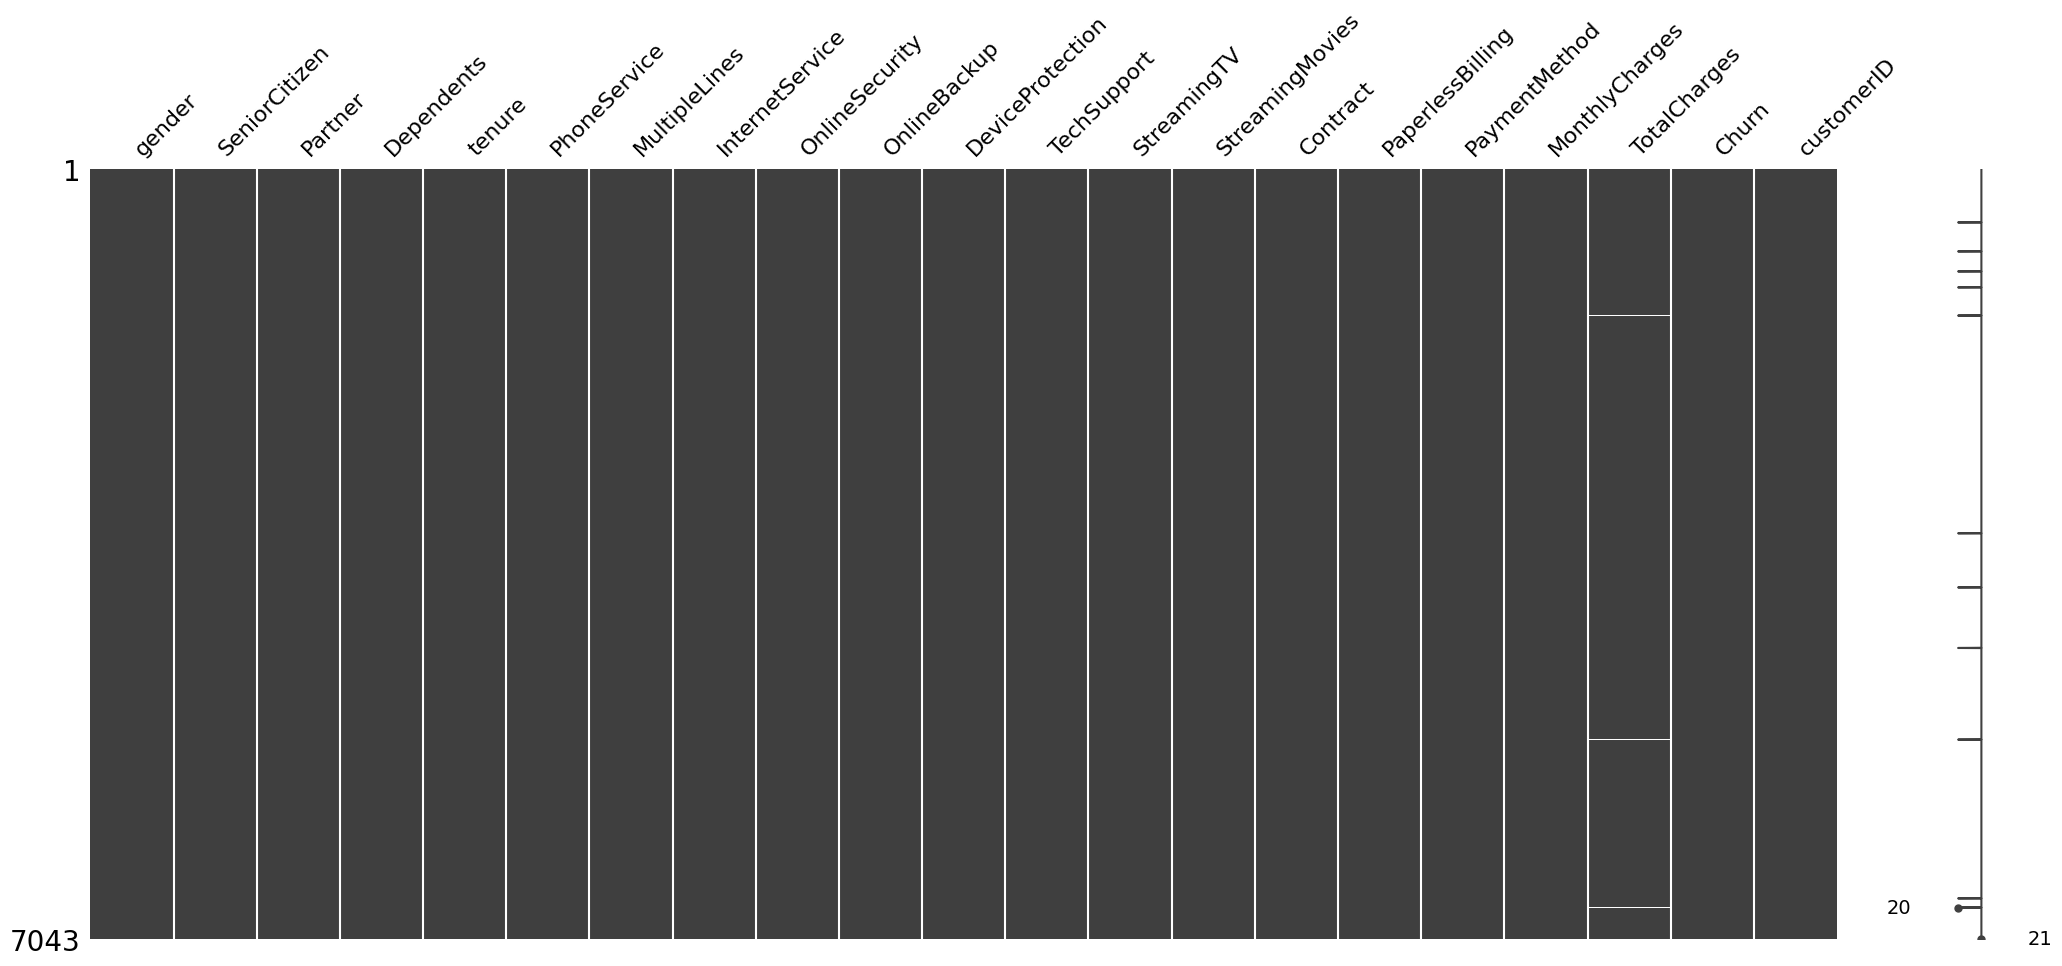

In [ ]:
msno.matrix(df)

* Hallazgo: La variable "TotalCharges" es el unico que tiene valores nulos.

In [ ]:
df['Churn'] = df['Churn'].replace(['No'],'0')
df['Churn'] = df['Churn'].replace(['Yes'],'1')
df['Churn'] = df['Churn'].astype('int')

0    0.73463
1    0.26537
Name: Churn, dtype: float64

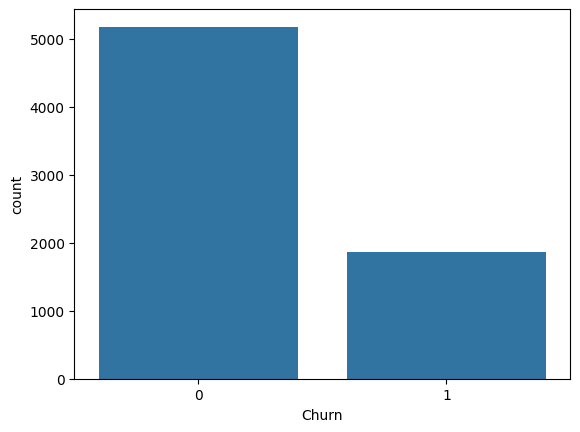

In [ ]:
#Realizamos la distribución de la variables Target
sns.countplot(data = df, x = "Churn")
df['Churn'].value_counts(1).sort_index(inplace=False)

* Hallazgo 2: De todos los usuarios de la empresa, el 26% se ha ido de la empresa y el 73% se ha quedado en este mes

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,7590-VHVEG
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,5575-GNVDE
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3668-QPYBK
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,7795-CFOCW
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,9237-HQITU


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2266.771362,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


* Si std > mean(promedio). Es probable que haya valores atipicos
* No evaluamos "Churn" ya que es el target
* SeniorCitizen es probable que tenga algunos valores atipicos
* El 0.15% de valores nulos tiene la variable "TotalCharges"

In [ ]:
Variables = ["SeniorCitizen",	"tenure",	"MonthlyCharges", "TotalCharges",	"Churn"]

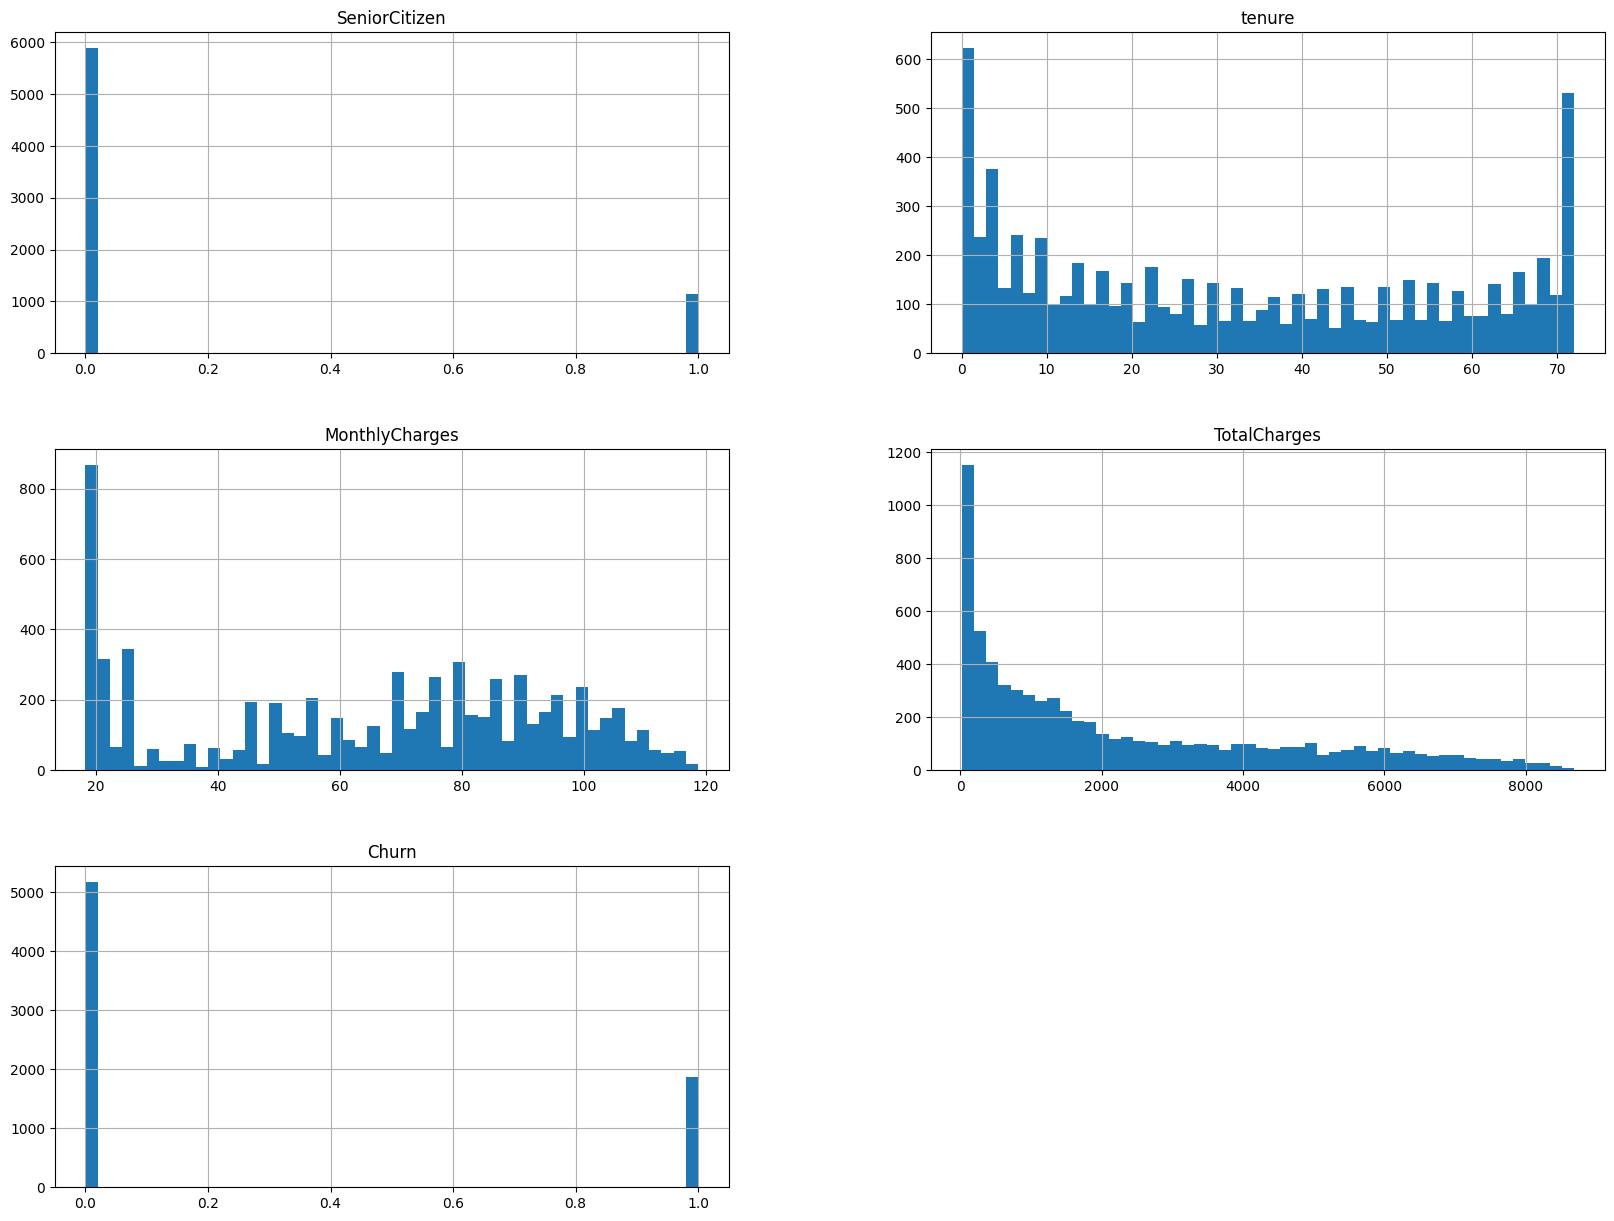

In [ ]:
df[Variables].hist(bins=50, figsize=(20, 15))
plt.show()

<Axes: >

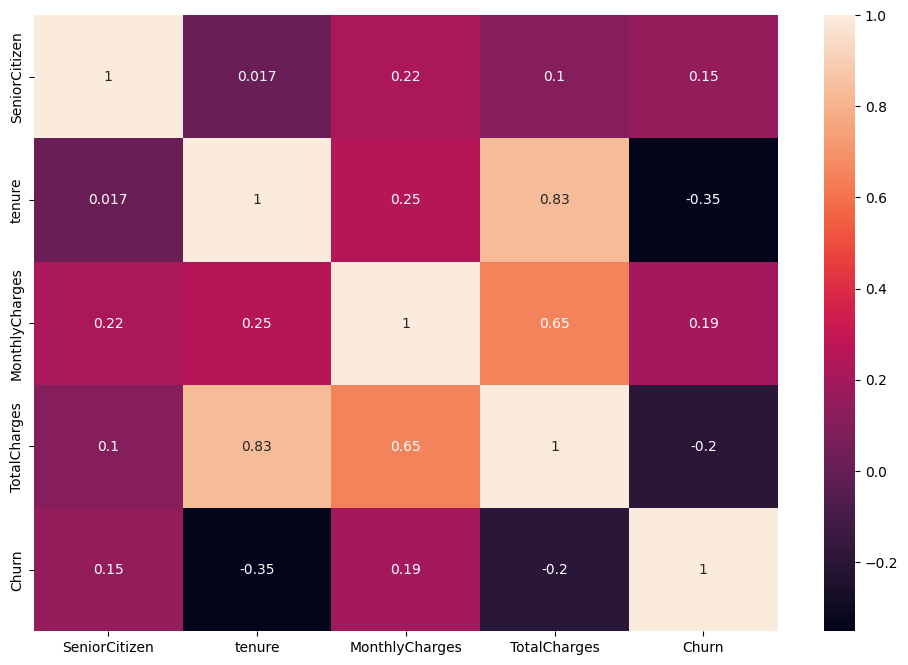

In [ ]:
corr = df[["SeniorCitizen",	"tenure",	"MonthlyCharges", "TotalCharges",	"Churn"]].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

* Las variables "Ternure" y "MonthlyCharges" son las que tienen mayor correlacion con nuestro target("Churn")

In [ ]:
categorical_attributes = df.select_dtypes(include="object")

In [ ]:
categorical_attributes.dtypes

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
customerID          object
dtype: object

In [ ]:
df[['gender','Churn']].groupby('gender').agg(['count','sum','mean'])

Churn               
       count  sum      mean
gender                     
Female  3488  939  0.269209
Male    3555  930  0.261603

* Del total de clientes que se han quedado en la empresa que representa el 26%, podemos afirmar que el 26% son mujeres y el otro 26% son hombres

In [ ]:
df[['MultipleLines','Churn']].groupby('MultipleLines').agg(['count','sum','mean'])

Churn               
                 count  sum      mean
MultipleLines                        
No                3390  849  0.250442
No phone service   682  170  0.249267
Yes               2971  850  0.286099

* Del 26% de clientes que todavia permanecen:
  - El 28% tiene multiples lineas
  - El 25% no tiene multiples lineas
  - El 24% no tiene lineas de internet

In [ ]:
df[['Contract','Churn']].groupby('Contract').agg(['count','sum','mean'])

Churn                
               count   sum      mean
Contract                            
Month-to-month  3875  1655  0.427097
One year        1473   166  0.112695
Two year        1695    48  0.028319

Del 73% de clientes que todavia permanecen:
  - El 42% paga mensual
  - El 11% paga anualmente
  - El 0.02 paga cada 2 anios

# Para el Tratamiento de datos en este caso no tenemos outlayers debido a los histogramas ya vistos anteriormente

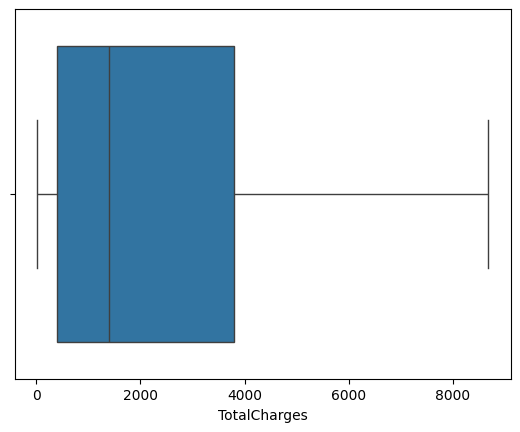

In [ ]:
sns.boxplot(data=df,x='TotalCharges')
plt.show()

Procedemos a imputar valores nulos

In [ ]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [ ]:
df['TotalCharges'] = df['TotalCharges'].fillna(2284)

In [ ]:
df['TotalCharges'].describe()

count    7043.000000
mean     2283.301533
std      2265.000258
min        18.800000
25%       402.225000
50%      1400.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,7590-VHVEG
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,5575-GNVDE
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3668-QPYBK
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,7795-CFOCW
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,9237-HQITU


In [ ]:
df['genderEncoded']= df['gender'].map({'Female':1, 'Male':2}).astype(int)

In [ ]:
df['partnerEncoded'] = df['Partner'].map({'Yes':1, 'No':0}).astype(int)

In [ ]:
df['dependentsEncoded'] = df['Dependents'].map({'No':0, 'Yes':1}).astype(int)

In [ ]:
df['phoneServiceEncoded'] =df['PhoneService'].map({'Yes':1, 'No':0}).astype(int)

In [ ]:
df.loc[df['Contract']== 'Month-to-month', 'contractEncoded'] = 0
df.loc[df['Contract']== 'One year', 'contractEncoded'] = 1
df.loc[df['Contract']== 'Two year', 'contractEncoded'] = 2

In [ ]:
df.loc[df['MultipleLines']== 'No', 'multipleLinesEncoded'] = 0
df.loc[df['MultipleLines']== 'No phone service', 'multipleLinesEncoded'] = 1
df.loc[df['MultipleLines']== 'Yes', 'multipleLinesEncoded'] = 2

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,customerID,genderEncoded,partnerEncoded,dependentsEncoded,phoneServiceEncoded,contractEncoded,multipleLinesEncoded
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,29.85,29.85,0,7590-VHVEG,1,1,0,0,0.0,1.0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,56.95,1889.50,0,5575-GNVDE,2,0,0,1,1.0,0.0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,53.85,108.15,1,3668-QPYBK,2,0,0,1,0.0,0.0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,42.30,1840.75,0,7795-CFOCW,2,0,0,0,1.0,1.0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,70.70,151.65,1,9237-HQITU,1,0,0,1,0.0,0.0


In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'customerID',
       'genderEncoded', 'partnerEncoded', 'dependentsEncoded',
       'phoneServiceEncoded', 'contractEncoded', 'multipleLinesEncoded'],
      dtype='object')

In [ ]:
drop_elements = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                 'MonthlyCharges', 'TotalCharges', 'customerID']
df_encoded = df.drop(drop_elements, axis=1)

In [ ]:
df_encoded.head()

,Churn,genderEncoded,partnerEncoded,dependentsEncoded,phoneServiceEncoded,contractEncoded,multipleLinesEncoded
0,0,1,1,0,0,0.0,1.0
1,0,2,0,0,1,1.0,0.0
2,1,2,0,0,1,0.0,0.0
3,0,2,0,0,0,1.0,1.0
4,1,1,0,0,1,0.0,0.0


# Seleccion de Datos

In [ ]:
df_encoded.groupby('Churn').size()

Churn
0    5174
1    1869
dtype: int64

Clase 0 Clientes-Presentes:  5174
Clase 1 Cilentes-Fugados:  1869
proporción:  2.77 : 1


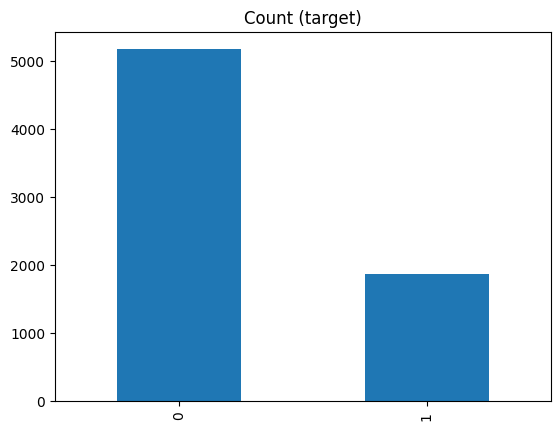

In [ ]:
target_count = df_encoded.Churn.value_counts()
print("Clase 0 Clientes-Presentes: ", target_count[0])
print("Clase 1 Cilentes-Fugados: ", target_count[1])
print("proporción: ", round(target_count[0]/target_count[1], 2), ": 1")
target_count.plot(kind="bar", title = "Count (target)");

In [ ]:
df_encoded.columns

Index(['Churn', 'genderEncoded', 'partnerEncoded', 'dependentsEncoded',
       'phoneServiceEncoded', 'contractEncoded', 'multipleLinesEncoded'],
      dtype='object')

<Axes: >

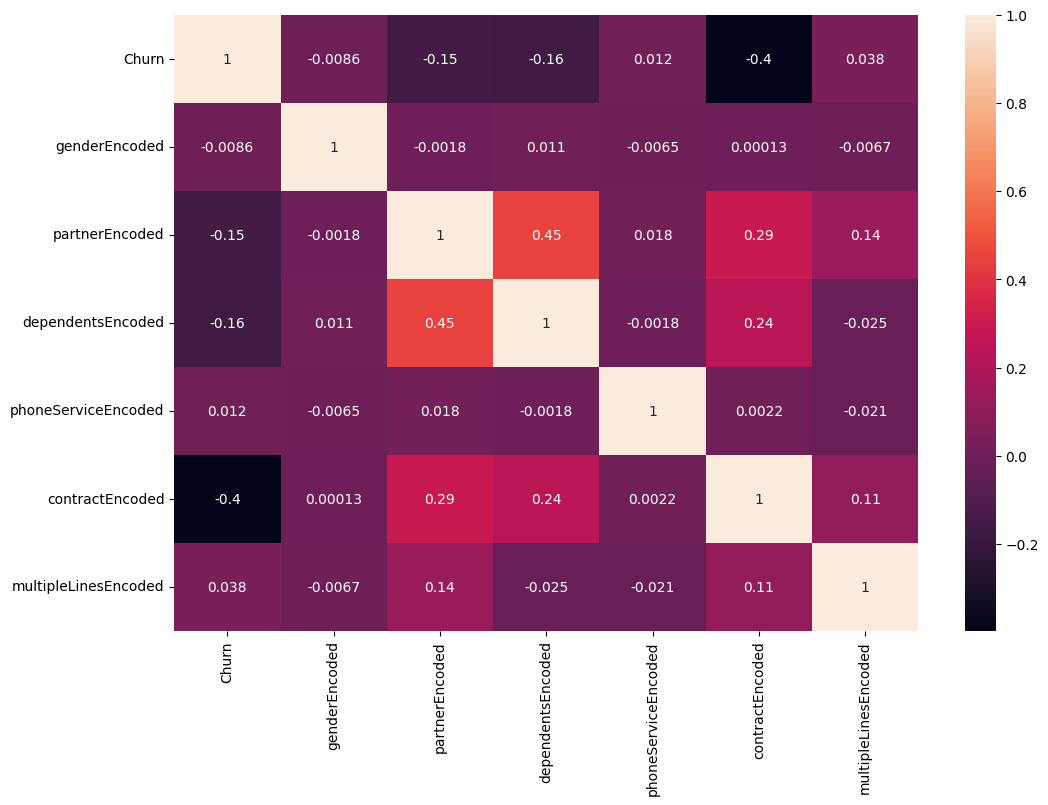

In [ ]:
corr = df_encoded.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)

* Tiene mayor correlacion el target con (contractEncoded, dependedEncoded,
   partnerEncoded)  

In [ ]:
from sklearn.feature_selection import SelectKBest

x=df_encoded.drop(['Churn'], axis=1)
y=df_encoded['Churn']

best=SelectKBest(k=3)
x_new = best.fit_transform(x, y)
x_new.shape
selected = best.get_support(indices=True)
print(x.columns[selected])

Index(['partnerEncoded', 'dependentsEncoded', 'contractEncoded'], dtype='object')


In [ ]:
x = df_encoded[['contractEncoded', 'dependentsEncoded','partnerEncoded']]
y = df_encoded['Churn']

import sklearn.model_selection as model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.75,test_size=0.25, random_state=1200)
# 75% al train
# 25% al test

# Balanceo de Datos: Oversampling y Undersampling

In [ ]:
# Unificamos todo el train
df_train = pd.concat([x_train,y_train], axis=1)

In [ ]:
df_train.head(3)

,contractEncoded,dependentsEncoded,partnerEncoded,Churn
4519,1.0,0,1,0
4813,0.0,1,0,0
4340,0.0,1,0,0


In [ ]:
# Hacemos un balanceo. Particionando los clientes que siguen en la empresa y los que no

count_class_0, count_class_1 = df_train.Churn.value_counts()

df_class_0 = df_train[df_train['Churn']==0]
df_class_1 = df_train[df_train['Churn']==1]

In [ ]:
count_class_0, len(df_class_0), count_class_1, len(df_class_1)

# 3875 son los clientes que permanecen en la empresa
# 1407 son los clientes que ya se han retirado de la empresa

(3875, 3875, 1407, 1407)

# UnderSampling


In [ ]:
# Tomamos una muestra de los clientes que se quedaron en la empresa para tener un dataset final que este equilibrado
df_class_0.sample(3)

,contractEncoded,dependentsEncoded,partnerEncoded,Churn
1112,2.0,0,0,0
6254,2.0,0,1,0
5691,1.0,0,0,0


Undersampling:
0    1407
1    1407
Name: Churn, dtype: int64


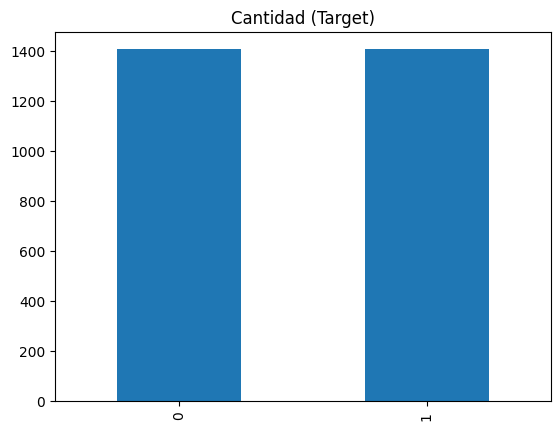

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1,random_state=1200)
df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)

# Undersampling me ayuda a balancear los 0 a 1

print('Undersampling:')
print(df_train_under.Churn.value_counts())

df_train_under.Churn.value_counts().plot(kind='bar', title='Cantidad (Target)');

# OverSampling

In [ ]:
# Muestreo con reemplazamiento

aux = df_class_1.head(2)
aux.sample(3, replace=True)

,contractEncoded,dependentsEncoded,partnerEncoded,Churn
8,0.0,0,1,1
964,0.0,0,0,1
8,0.0,0,1,1


Random over-sampling:
0    3875
1    3875
Name: Churn, dtype: int64


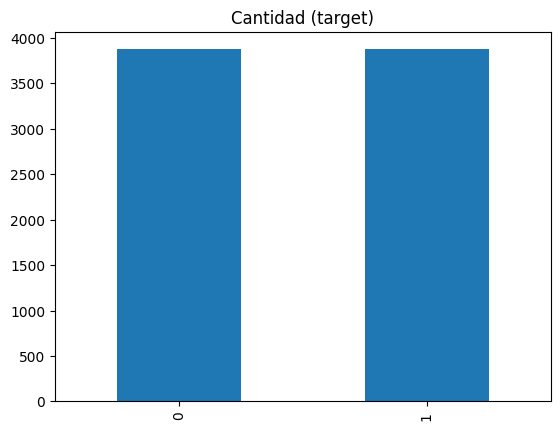

In [ ]:
# De los que todavia permanecen en la empresa(df_class_0) toma una muestra de los clientes que ya se retiraron de la empresa (count_class_1).
# replace=True -> Te indica que una observacion puede salir varias veces
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_train_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_train_over.Churn.value_counts())

df_train_over.Churn.value_counts().plot(kind='bar', title='Cantidad (target)');

In [ ]:
df_train.Churn.value_counts()

0    3875
1    1407
Name: Churn, dtype: int64

In [ ]:
df_train_under.Churn.value_counts()

0    1407
1    1407
Name: Churn, dtype: int64

In [ ]:
df_train_over.Churn.value_counts()

0    3875
1    3875
Name: Churn, dtype: int64

# Probaremos los modelos

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss

#Declarando el modelo
model = DecisionTreeClassifier()
#Entrenando el modelo que tiene el desbalance
model.fit(x_train, y_train)
#Generando la predicción. Hacemos validaciones SIEMPRE CON EL TEST
y_pred = model.predict(x_test)

# Metricas referenciales

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy DATOS ORIGINALES: %.2f%%" % (accuracy * 100.0))


ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy DATOS ORIGINALES: 73.76%
Log Loss: 9.45608623837145


In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión - DATOS ORIGINALES:\n', conf_mat)

Matriz de Confusión - DATOS ORIGINALES:
 [[1299    0]
 [ 462    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-56-76d18ea01990>:11: UserWarning: FixedFormatter 

Métricas de Matriz de Confusión - DATOS ORIGINALES:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1299
           1       0.00      0.00      0.00       462

    accuracy                           0.74      1761
   macro avg       0.37      0.50      0.42      1761
weighted avg       0.54      0.74      0.63      1761



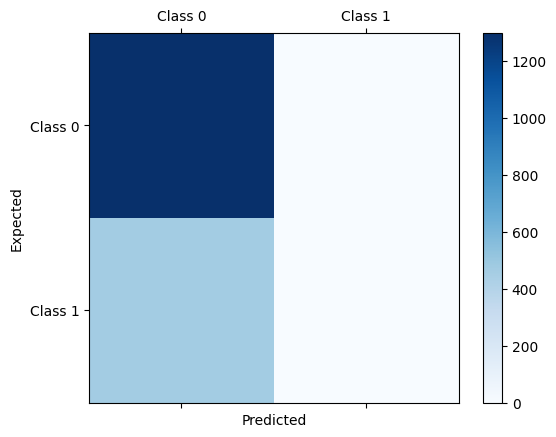

In [ ]:
# Detalles y precision del recall
# Es mejor usar el classification_report ya que es mas completo
from sklearn.metrics import classification_report
print('Métricas de Matriz de Confusión - DATOS ORIGINALES:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Si mi metrica a elegir es la precision(0.74) y mi recall es de (1.00)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

x_train_u= df_train_under[['contractEncoded', 'dependentsEncoded','partnerEncoded']]
y_train_u = df_train_under[['Churn']]

model.fit(x_train_u, y_train_u) # Hacemos el entrenamiento
y_pred = model.predict(x_test)  # Validamos las predicciones para el test

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy UNDERSAMPLING: %.2f%%" % (accuracy * 100.0))
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy UNDERSAMPLING: 63.83%
Log Loss: 13.037937086239422


In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión UNDERSAMPLING:\n', conf_mat)

Matriz de Confusión UNDERSAMPLING:
 [[725 574]
 [ 63 399]]


Métricas de Matriz de Confusión - UNDERSAMPLING:
               precision    recall  f1-score   support

           0       0.92      0.56      0.69      1299
           1       0.41      0.86      0.56       462

    accuracy                           0.64      1761
   macro avg       0.67      0.71      0.63      1761
weighted avg       0.79      0.64      0.66      1761



<ipython-input-59-df5ce6b3f2dd>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-59-df5ce6b3f2dd>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


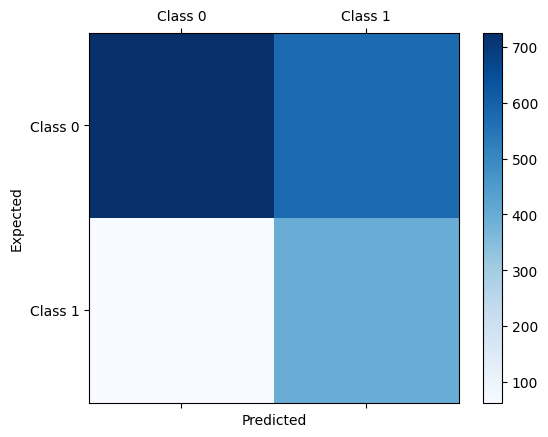

In [ ]:
print('Métricas de Matriz de Confusión - UNDERSAMPLING:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

En terminos de precision subio (92%) y recall bajo (56%)

# Oversampling

In [ ]:
model = DecisionTreeClassifier()

x_train_o= df_train_over[['contractEncoded', 'dependentsEncoded','partnerEncoded']]
y_train_o = df_train_over[['Churn']]

model.fit(x_train_o, y_train_o)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy OVERSAMPLING: %.2f%%" % (accuracy * 100.0))
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy OVERSAMPLING: 63.83%
Log Loss: 13.037937086239422


In [ ]:
# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión OVERSAMPLING:\n', conf_mat)

Matriz de Confusión OVERSAMPLING:
 [[725 574]
 [ 63 399]]


Métricas de Matriz de Confusión - OVERSAMPLING:
               precision    recall  f1-score   support

           0       0.92      0.56      0.69      1299
           1       0.41      0.86      0.56       462

    accuracy                           0.64      1761
   macro avg       0.67      0.71      0.63      1761
weighted avg       0.79      0.64      0.66      1761



<ipython-input-62-5633283348c2>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-62-5633283348c2>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


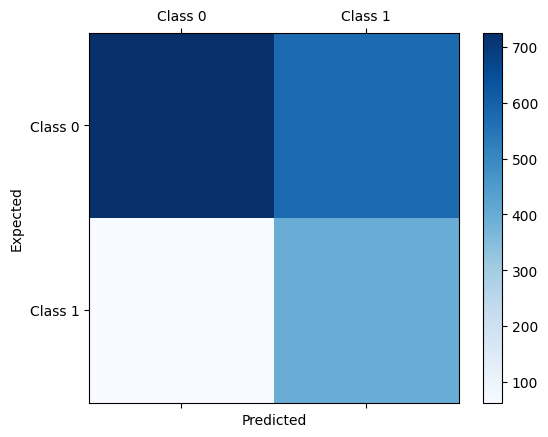

In [ ]:
print('Métricas de Matriz de Confusión - OVERSAMPLING:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

La precision sube a 92% y el recall baja a 56%

# Modelado

In [ ]:
!pip install xgboost

Evaluaremos los escenarios de XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
model1 = xgb.XGBClassifier()

In [ ]:
model2 = xgb.XGBClassifier(n_estimators=20 , max_depth=8, learning_rate=0.1 , subsample=0.5)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model3 = RandomForestClassifier()

In [ ]:
model4 = RandomForestClassifier(n_estimators=20, max_depth=8)

# Modelo Undersampling

In [ ]:
model1.fit(x_train_u, y_train_u)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
model2.fit(x_train_u, y_train_u)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
model3.fit(x_train_u, y_train_u)

<ipython-input-72-e00b2287d3ea>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(x_train_u, y_train_u)


RandomForestClassifier()

In [ ]:
model4.fit(x_train_u, y_train_u)

<ipython-input-73-5125a4fcf682>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model4.fit(x_train_u, y_train_u)


RandomForestClassifier(max_depth=8, n_estimators=20)

In [ ]:
# Agregabdo un clasificador de arbol simple
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier()
model5.fit(x_train_u, y_train_u)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)
pred3 = model3.predict(x_test)
pred4 = model4.predict(x_test)
pred5 = model5.predict(x_test)

# Evaluacion Undersampling

In [ ]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.92      0.56      0.69      1299
           1       0.41      0.86      0.56       462

    accuracy                           0.64      1761
   macro avg       0.67      0.71      0.63      1761
weighted avg       0.79      0.64      0.66      1761



In [ ]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.92      0.56      0.69      1299
           1       0.41      0.86      0.56       462

    accuracy                           0.64      1761
   macro avg       0.67      0.71      0.63      1761
weighted avg       0.79      0.64      0.66      1761



In [ ]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.92      0.56      0.69      1299
           1       0.41      0.86      0.56       462

    accuracy                           0.64      1761
   macro avg       0.67      0.71      0.63      1761
weighted avg       0.79      0.64      0.66      1761



In [ ]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.92      0.56      0.69      1299
           1       0.41      0.86      0.56       462

    accuracy                           0.64      1761
   macro avg       0.67      0.71      0.63      1761
weighted avg       0.79      0.64      0.66      1761



In [ ]:
print(classification_report(y_test,pred5))

              precision    recall  f1-score   support

           0       0.92      0.56      0.69      1299
           1       0.41      0.86      0.56       462

    accuracy                           0.64      1761
   macro avg       0.67      0.71      0.63      1761
weighted avg       0.79      0.64      0.66      1761



In [ ]:
df = pd.DataFrame({'algorithm' : ['XGBoost','XGBoost Tuneado','RF','RF Tuneado','Arbol de Decision'],
                   'precision' : [0.92, 0.92, 0.92,0.92,0.92],
                   'recall' : [0.56, 0.56, 0.56,0.56,0.56]})

In [ ]:
df

,algorithm,precision,recall
0,XGBoost,0.92,0.56
1,XGBoost Tuneado,0.92,0.56
2,RF,0.92,0.56
3,RF Tuneado,0.92,0.56
4,Arbol de Decision,0.92,0.56


# Modelo Oversampling

In [ ]:
model1.fit(x_train_o, y_train_o)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
model2.fit(x_train_o, y_train_o)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
model3.fit(x_train_o, y_train_o)

<ipython-input-86-1eaa6af56735>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(x_train_o, y_train_o)


RandomForestClassifier()

In [ ]:
model4.fit(x_train_o, y_train_o)

<ipython-input-87-88eb2f854bc8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model4.fit(x_train_o, y_train_o)


RandomForestClassifier(max_depth=8, n_estimators=20)

In [ ]:
# Agregando un clasificador de arbol simple
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier()
model5.fit(x_train_o, y_train_o)

DecisionTreeClassifier()

In [ ]:
pred1_o = model1.predict(x_test)
pred2_o = model2.predict(x_test)
pred3_o = model3.predict(x_test)
pred4_o = model4.predict(x_test)
pred5_o = model5.predict(x_test)

# Evaluacion Oversampling

In [ ]:
print(classification_report(y_test,pred1_o))

              precision    recall  f1-score   support

           0       0.92      0.56      0.69      1299
           1       0.41      0.86      0.56       462

    accuracy                           0.64      1761
   macro avg       0.67      0.71      0.63      1761
weighted avg       0.79      0.64      0.66      1761



In [ ]:
print(classification_report(y_test,pred2_o))

              precision    recall  f1-score   support

           0       0.92      0.56      0.69      1299
           1       0.41      0.86      0.56       462

    accuracy                           0.64      1761
   macro avg       0.67      0.71      0.63      1761
weighted avg       0.79      0.64      0.66      1761



In [ ]:
print(classification_report(y_test,pred3_o))

              precision    recall  f1-score   support

           0       0.92      0.56      0.69      1299
           1       0.41      0.86      0.56       462

    accuracy                           0.64      1761
   macro avg       0.67      0.71      0.63      1761
weighted avg       0.79      0.64      0.66      1761



In [ ]:
print(classification_report(y_test,pred4_o))

              precision    recall  f1-score   support

           0       0.92      0.56      0.69      1299
           1       0.41      0.86      0.56       462

    accuracy                           0.64      1761
   macro avg       0.67      0.71      0.63      1761
weighted avg       0.79      0.64      0.66      1761



In [ ]:
print(classification_report(y_test,pred5_o))

              precision    recall  f1-score   support

           0       0.92      0.56      0.69      1299
           1       0.41      0.86      0.56       462

    accuracy                           0.64      1761
   macro avg       0.67      0.71      0.63      1761
weighted avg       0.79      0.64      0.66      1761



In [ ]:
df_o = pd.DataFrame({'algorithm' : ['XGBoost','XGBoost Tuneado','RF','RF Tuneado','Arbol de Decision'],
                   'precision' : [0.92, 0.92, 0.92,0.92,0.92],
                   'recall' : [0.56, 0.56, 0.56,0.56,0.56]})

In [ ]:
df_o

,algorithm,precision,recall
0,XGBoost,0.92,0.56
1,XGBoost Tuneado,0.92,0.56
2,RF,0.92,0.56
3,RF Tuneado,0.92,0.56
4,Arbol de Decision,0.92,0.56


# Data real

In [ ]:
df_real = pd.read_csv("telecom_customer_churn.csv", sep=';')

In [ ]:
df_real.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,7590-VHVEG
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,5575-GNVDE
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3668-QPYBK
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,7795-CFOCW
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,9237-HQITU


In [ ]:
df_real['Churn'] = df_real['Churn'].replace(['No'],'0')
df_real['Churn'] = df_real['Churn'].replace(['Yes'],'1')
df_real['Churn'] = df_real['Churn'].astype('int')

In [ ]:
df_real['Contract']= df_real['Contract'].replace(['Month-to-month'], '0')
df_real['Contract']= df_real['Contract'].replace(['One year'], '1')
df_real['Contract']= df_real['Contract'].replace(['Two year'], '2')
df_real['Contract'] = df_real['Contract'].astype('int')

In [ ]:
df_real['Partner']= df_real['Partner'].replace(['No'], '0')
df_real['Partner']= df_real['Partner'].replace(['No phone service'], '1')
df_real['Partner']= df_real['Partner'].replace(['Yes'], '2')
df_real['Partner'] = df_real['Partner'].astype('int')

In [ ]:
df_real['Dependents']= df_real['Dependents'].replace(['No'], '0')
df_real['Dependents']= df_real['Dependents'].replace(['Yes'], '1')
df_real['Dependents'] = df_real['Dependents'].astype('int')

In [ ]:
df_real.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID
0,Female,0,2,0,1,No,No phone service,DSL,No,Yes,...,No,No,No,0,Yes,Electronic check,29.85,29.85,0,7590-VHVEG
1,Male,0,0,0,34,Yes,No,DSL,Yes,No,...,No,No,No,1,No,Mailed check,56.95,1889.50,0,5575-GNVDE
2,Male,0,0,0,2,Yes,No,DSL,Yes,Yes,...,No,No,No,0,Yes,Mailed check,53.85,108.15,1,3668-QPYBK


In [ ]:
x = df_real[['Contract','Dependents','Partner']]
y = df_real['Churn']
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.75,test_size=0.25, random_state=1200)

model.fit(x,y)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy DATOS ORIGINALES: %.2f%%" % (accuracy * 100.0))


ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy DATOS ORIGINALES: 73.76%
Log Loss: 9.45608623837145


In [ ]:
model1.fit(x, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
model2.fit(x, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
model3.fit(x, y)

RandomForestClassifier()

In [ ]:
model4.fit(x, y)

RandomForestClassifier(max_depth=8, n_estimators=20)

In [ ]:
model5.fit(x, y)

DecisionTreeClassifier()

In [ ]:
pred1_real = model1.predict(x_test)
pred2_real = model2.predict(x_test)
pred3_real = model3.predict(x_test)
pred4_real = model4.predict(x_test)
pred5_real = model5.predict(x_test)

# Evaluando

In [ ]:
print(classification_report(y_test,pred1_real))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1299
           1       0.00      0.00      0.00       462

    accuracy                           0.74      1761
   macro avg       0.37      0.50      0.42      1761
weighted avg       0.54      0.74      0.63      1761



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test,pred2_real))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1299
           1       0.00      0.00      0.00       462

    accuracy                           0.74      1761
   macro avg       0.37      0.50      0.42      1761
weighted avg       0.54      0.74      0.63      1761



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test,pred3_real))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1299
           1       0.00      0.00      0.00       462

    accuracy                           0.74      1761
   macro avg       0.37      0.50      0.42      1761
weighted avg       0.54      0.74      0.63      1761



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test,pred4_real))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1299
           1       0.00      0.00      0.00       462

    accuracy                           0.74      1761
   macro avg       0.37      0.50      0.42      1761
weighted avg       0.54      0.74      0.63      1761



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(y_test,pred5_real))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1299
           1       0.00      0.00      0.00       462

    accuracy                           0.74      1761
   macro avg       0.37      0.50      0.42      1761
weighted avg       0.54      0.74      0.63      1761



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df_r =pd.DataFrame({'algorithm' : ['XGBoost','XGBoost Tuneado','RF','RF Tuneado','Arbol de Decision'],
                   'precision' : [0.74, 0.74, 0.74,0.74,0.74],
                   'recall' : [1.00, 1.00, 1.00,1.00,1.00]})

In [ ]:
df_r

,algorithm,precision,recall
0,XGBoost,0.74,1.0
1,XGBoost Tuneado,0.74,1.0
2,RF,0.74,1.0
3,RF Tuneado,0.74,1.0
4,Arbol de Decision,0.74,1.0
